In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('insurance.csv')

In [7]:
sample_data = data.head()
with open("sample_data.tex", 'w') as f:
    f.write(sample_data.to_latex())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
desc = data.describe(include = 'all')
with open("desc_data.tex", 'w') as f:
    f.write(desc.to_latex())

In [28]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

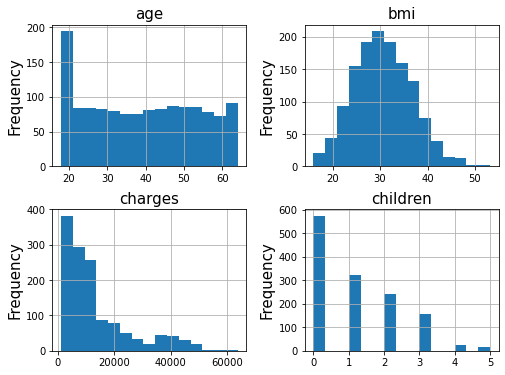

In [72]:
axs = numerical_data.hist(figsize=(8,6), bins=15)
for ax in axs.flatten():
    ax.set_ylabel('Frequency', fontsize=15)
    ax.set_title(ax.title.get_text(),fontdict = {'fontsize': 15})
plt.savefig('histograms.png')
plt.show()

In [81]:
obj_data = data.select_dtypes(include=['object'])
obj_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


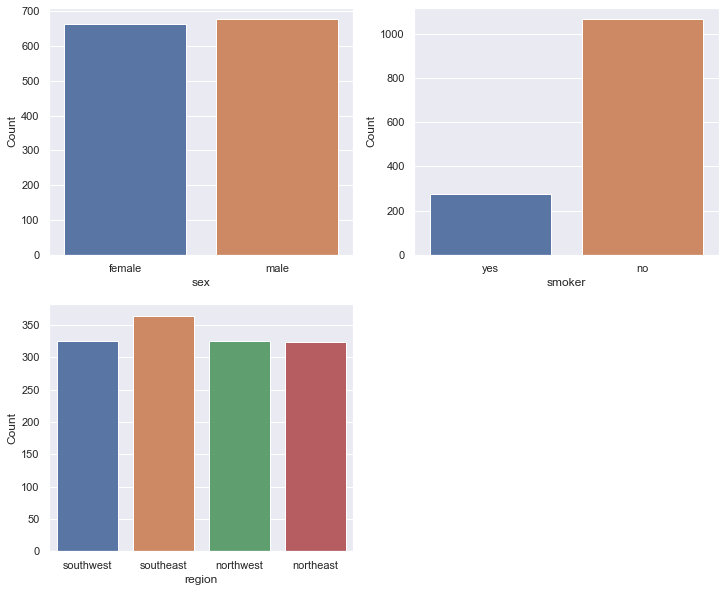

In [130]:
i=1
plt.figure(figsize=(12,10))
for col in obj_data.columns:
    plt.subplot(2,2,i)
    sb.countplot(obj_data[col])
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(col, fontsize=12)
    i=i+1
plt.savefig('barplots_cat.png')
plt.show()

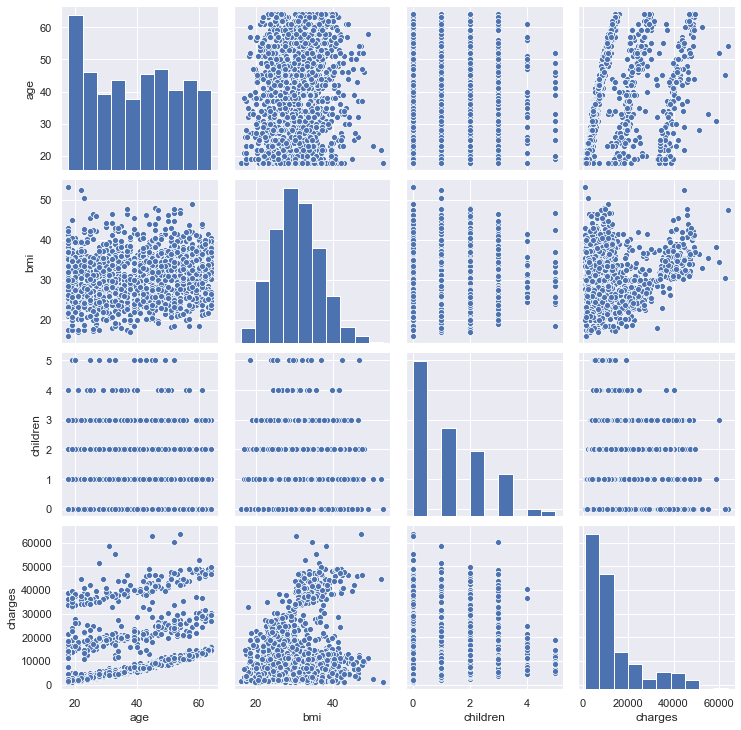

In [125]:
sb.set(font_scale=1)
sb.pairplot(data)
plt.savefig('pairplots.png')

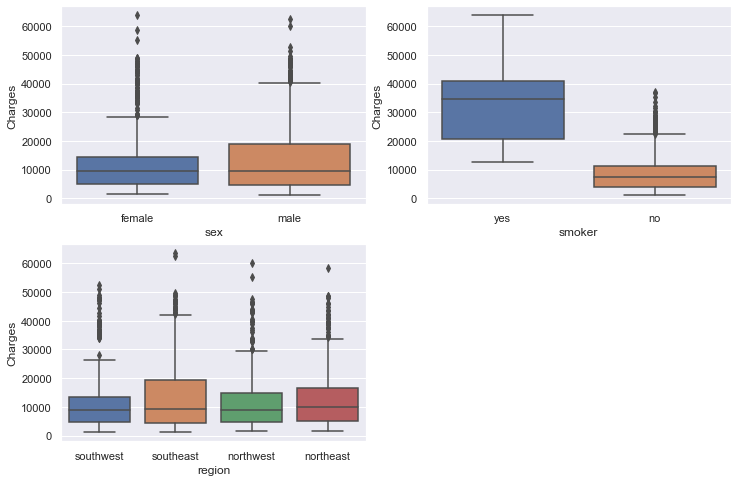

In [134]:
i=1
plt.figure(figsize=(12,8))
for col in obj_data.columns:
    plt.subplot(2,2,i)
    sb.boxplot(data=data, y = 'charges', x = col)
    plt.ylabel('Charges', fontsize=12)
    plt.xlabel(col, fontsize=12)
    i=i+1
plt.savefig('boxplots_cat.png')
plt.show()


In [135]:
from sklearn.preprocessing import OneHotEncoder

In [138]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['sex', 'smoker', 'region'], drop_first=True)
one_hot_encoded_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [140]:
with open("sample_data_fe.tex", 'w') as f:
    f.write(one_hot_encoded_data.head().to_latex())

In [143]:
from scipy import stats
rvs1 = data[data['sex']=='male']['charges']
rvs2 = data[data['sex']=='female']['charges']
stats.ttest_ind(rvs1, rvs2, equal_var=True)

Ttest_indResult(statistic=2.097546590051688, pvalue=0.03613272100592976)

In [144]:
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=2.1008878232359565, pvalue=0.035841014956016645)